### Primer proyecto personal de reconiciemto de digitos

#### Importamos lo necesasrio

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf

In [49]:
path=r'C:\Users\piere\Curso python en linea\Proyectos personales\Digit reconicer\train.csv'
train=pd.read_csv(path)

In [50]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
test=pd.read_csv(r'C:\Users\piere\Curso python en linea\Proyectos personales\Digit reconicer\test.csv')

In [51]:
label=train.label

In [52]:
label=pd.DataFrame(label)

In [53]:
X=test.iloc[0]

In [35]:
X1=X.to_numpy()

In [37]:
x1=X1.reshape(28,28)

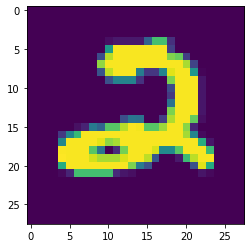

In [54]:
plt.imshow(x1)

In [57]:
train.pop("label")

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [128]:
trainnp=train.to_numpy()

In [130]:
trainnp=trainnp.reshape(-1,28,28,1)

In [131]:
trainnp.shape

(42000, 28, 28, 1)

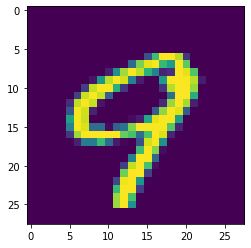

In [78]:
plt.imshow(trainnp[100])

In [79]:
labelnp=label.to_numpy()

In [83]:
index=np.random.choice(np.arange(len(trainnp)),36,replace=False)

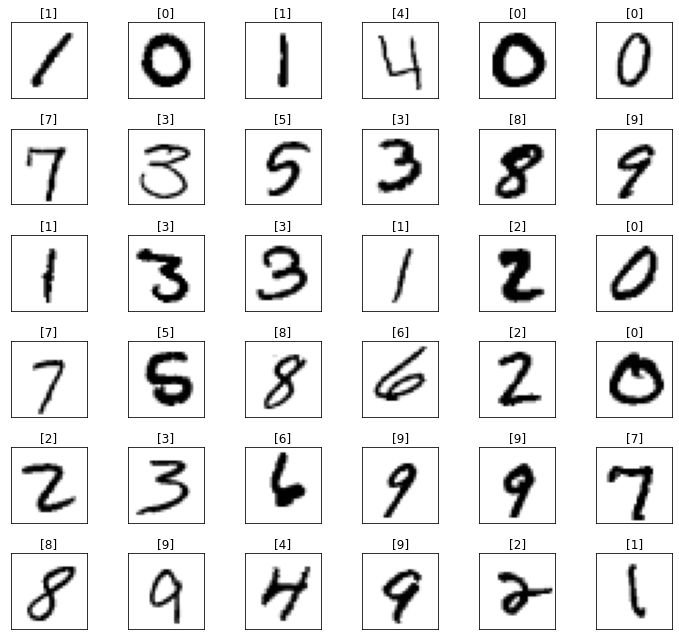

In [88]:
figure,axes=plt.subplots(nrows=6,ncols=6,figsize=(10,9),squeeze=False)
for item in zip(axes.ravel(),trainnp,labelnp):
    axes,image,target=item
    axes.imshow(image,cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)
plt.tight_layout() 

In [132]:
test.shape

(28000, 784)

In [133]:
testnp=test.reshape(-1,28,28,1)

In [98]:
from tensorflow.keras.models import Sequential

In [100]:
cnn=Sequential()

In [134]:
testnp.shape

(28000, 28, 28, 1)

In [103]:
testnp=testnp.astype('float32')/255
trainnp=trainnp.astype('float32')/255

In [105]:
from tensorflow.keras.utils import to_categorical

In [106]:
labelnp=to_categorical(labelnp)

In [109]:
labelnp[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [111]:
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

In [112]:
cnn.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))

In [113]:
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [114]:
cnn.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))

In [115]:
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [116]:
cnn.add(Flatten())

In [117]:
cnn.add(Dense(units=128,activation='relu'))

In [118]:
cnn.add(Dense(units=10,activation='softmax'))

In [121]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               409728    
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [136]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
labelnp.shape

### se entrena con el label 

In [139]:
cnn.fit(trainnp,labelnp,epochs=5,batch_size=64,validation_split=0.1)

Epoch 1/5
591/591 [==============================] - 67s 113ms/step - loss: 0.1035 - accuracy: 0.9688 - val_loss: 0.0727 - val_accuracy: 0.9776
Epoch 2/5
591/591 [==============================] - 74s 126ms/step - loss: 0.0584 - accuracy: 0.9820 - val_loss: 0.0719 - val_accuracy: 0.9790
Epoch 3/5
591/591 [==============================] - 78s 131ms/step - loss: 0.0449 - accuracy: 0.9858 - val_loss: 0.0549 - val_accuracy: 0.9817
Epoch 4/5
591/591 [==============================] - 76s 129ms/step - loss: 0.0360 - accuracy: 0.9885 - val_loss: 0.0652 - val_accuracy: 0.9836
Epoch 5/5
591/591 [==============================] - 74s 125ms/step - loss: 0.0289 - accuracy: 0.9904 - val_loss: 0.0600 - val_accuracy: 0.9843


In [145]:
cnn.evaluate(trainnp,labelnp)

1313/1313 [==============================] - 27s 20ms/step - loss: 0.0272 - accuracy: 0.9921


[0.02724628336727619, 0.9920952320098877]